In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/transformer_learn/Kaggle"

In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/transformer_learn/Kaggle
! kaggle datasets download -d validmodel/indo-fashion-dataset


/content/drive/MyDrive/Colab Notebooks/transformer_learn/Kaggle
100% 2.69G/2.69G [01:47<00:00, 27.9MB/s]
100% 2.69G/2.69G [01:47<00:00, 26.9MB/s]


In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/transformer_learn/Kaggle
!unzip indo-fashion-dataset.zip
!rm indo-fashion-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: images/val/3250.jpeg    
  inflating: images/val/3251.jpeg    
  inflating: images/val/3252.jpeg    
  inflating: images/val/3253.jpeg    
  inflating: images/val/3254.jpeg    
  inflating: images/val/3255.jpeg    
  inflating: images/val/3256.jpeg    
  inflating: images/val/3257.jpeg    
  inflating: images/val/3258.jpeg    
  inflating: images/val/3259.jpeg    
  inflating: images/val/326.jpeg     
  inflating: images/val/3260.jpeg    
  inflating: images/val/3261.jpeg    
  inflating: images/val/3262.jpeg    
  inflating: images/val/3263.jpeg    
  inflating: images/val/3264.jpeg    
  inflating: images/val/3265.jpeg    
  inflating: images/val/3266.jpeg    
  inflating: images/val/3267.jpeg    
  inflating: images/val/3268.jpeg    
  inflating: images/val/3269.jpeg    
  inflating: images/val/327.jpeg     
  inflating: images/val/3270.jpeg    
  inflating: images/val/3271.jpeg    
  inflating: images/val/3272.jpeg    

In [3]:
from PIL import Image
import os

# Specify the directory containing the JPEG files
jpeg_directory = '/content/drive/MyDrive/Colab Notebooks/transformer_learn/Kaggle/images/train'

# Iterate over all files in the directory
for filename in os.listdir(jpeg_directory):
    # Check if the file has a JPEG extension
    if filename.lower().endswith('.jpg') or filename.lower().endswith('.jpeg'):
        # Construct the full path to the JPEG file
        jpeg_file_path = os.path.join(jpeg_directory, filename)

        # Open the JPEG file
        with Image.open(jpeg_file_path) as image:
            # Construct the full path to the PNG file
            png_file_path = os.path.join(jpeg_directory, filename.rsplit('.', 1)[0] + '.png')

            # Save the image in PNG format
            image.save(png_file_path, 'PNG')

        # Delete the original JPEG file
        os.remove(jpeg_file_path)


In [ ]:
!pip install datasets
!pip install diffusers
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 14.0 MB/s eta 0:

# Declare TrainingArguments
1. `dataclass`: dataclass is a decorator introduced in Python 3.7 that simplifies the process of creating classes used mainly for storing data.
2. mixed_precision:
  *  Speed up training and reduce memory requirements without significantly affecting model accuracy.
  * The forward and backward passes of the model are typically performed using lower-precision data types
  * The weights are updated using a single-precision data type to maintain the model's accuracy

In [ ]:
from dataclasses import dataclass

@dataclass
class TrainingConfiguration:
    image_size = 128  # resolution of the generated images
    train_batch_size = 4
    eval_batch_size = 32  # number of images to sample during evaluation
    num_epochs = 100
    gradient_accumulation_steps = 2
    learning_rate = 2e-4
    lr_warmup_steps = 100
    save_image_epochs = 4
    save_model_epochs = 4
    mixed_precision = 'fp16'  
    output_dir = '/content/drive/MyDrive/Colab Notebooks/transformer_learn/chapter8/image_gen1'  # model name locally and on the HF Hub

    overwrite_output_dir = True  # overwrite the old model when re-running the notebook
    seed = 100

config = TrainingConfiguration()


In [ ]:
import torch
if not torch.cuda.is_available():
    config.mixed_precision = False

In [ ]:
config.mixed_precision

'fp16'

# Load the Dataset
1. It is dog image datasets with 1104 samples

In [ ]:
from datasets import load_dataset
dataset = load_dataset("BirdL/DALL-E-Dogs", split="train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1104 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/BirdL___parquet/BirdL--DALL-E-Dogs-3fef086dc9e2e9d7/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


In [ ]:
print(dataset)
print(dataset[0])

Dataset({
    features: ['Images'],
    num_rows: 1104
})
{'Images': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FBDF660DAB0>}


## Let's plot few images

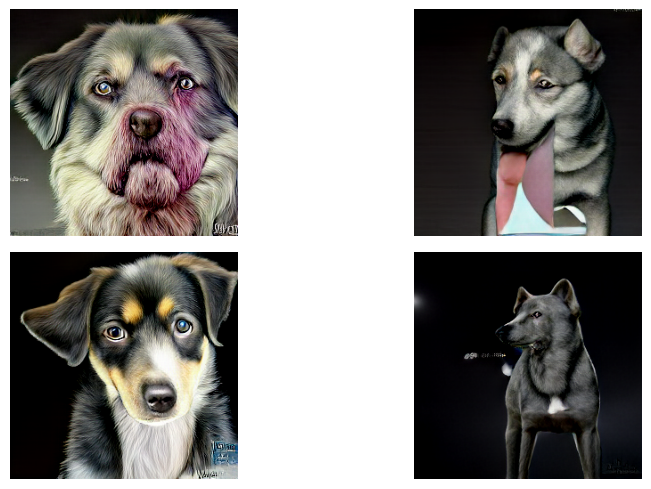

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_images(images, titles=None, cols=2, figsize=(10, 5)):
    rows = len(images) // cols + int(len(images) % cols > 0)
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    axs = axs.flatten()

    for idx, img in enumerate(images):
        axs[idx].imshow(img)
        axs[idx].axis("off")
        if titles:
            axs[idx].set_title(titles[idx])

    plt.tight_layout()
    plt.show()

# Select four random images from the dataset
four_images = [dataset[i]["Images"] for i in range(4)]

plot_images(four_images)


# Declare Transformation
1. dataset class provides image mechanism of applying transformation by just calling set_transform

In [ ]:
from torchvision import transforms

preprocess = transforms.Compose(
    [
        transforms.Resize((config.image_size, config.image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=15),  # Random rotation with a maximum of 15 degrees
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Color jitter
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["Images"]]
    return {"image": images}

dataset.set_transform(transform)

## Let's Plot the image after the transformation is applied.
1. Now, the image is in the form of tensor with (C,W,H). imshow requires images in the form of (W,H,C). Thus, we are doing permute(1,2,0)

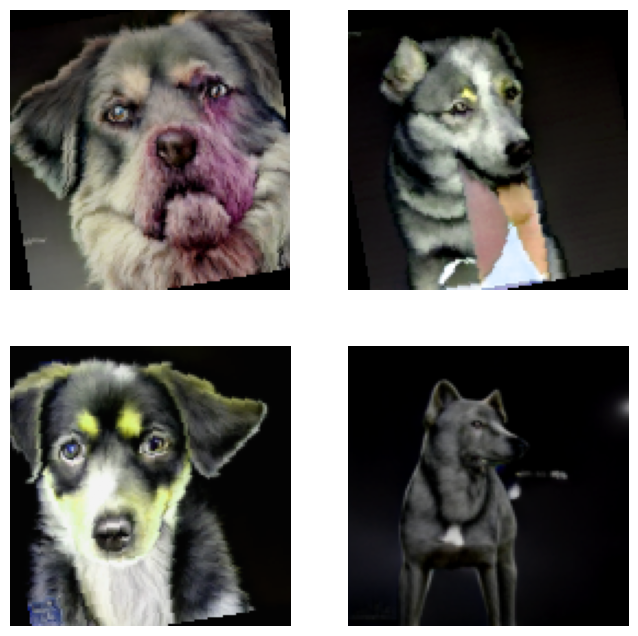

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i in range(2):
    for j in range(2):
        index = i * 2 + j
        image = dataset[index]['image'].permute(1, 2, 0).numpy() * 0.5 + 0.5  # Denormalize the image
        axes[i, j].imshow(image)
        axes[i, j].axis('off')

plt.show()

# Let's Declare train_loader

In [ ]:
import torch

train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=config.train_batch_size, shuffle=True)

# Let's Declare Unet2Model from the Diffusers.
Let's discuss the model parameters:


* sample_size: The size of the input images.
* in_channels: The number of input channels (e.g., 3 for RGB images).
* out_channels: The number of output channels (e.g., the number of classes for segmentation tasks).
* layers_per_block: The number of layers (convolutions) within each block of the U-Net architecture.
* block_out_channels: A tuple specifying the number of output channels for each block in the architecture.
* down_block_types: A tuple specifying the types of downsampling blocks to use in the encoding path.    
  1. "DownBlock2D": DownBlock2D is a custom implementation of a downsampling block used in the U-Net architecture. It has, CNN, Batch Normalization, and Pooling.
  2. "AttnDownBlock2D," 
up_block_types: A tuple specifying the types of upsampling blocks to use in the decoding path.
  1. "UpBlock2D" 
  2. "AttnUpBlock2D"



In [ ]:
from diffusers import UNet2DModel

model = UNet2DModel(
    sample_size=config.image_size,
    in_channels=3,
    out_channels=3,
    layers_per_block=3,
    block_out_channels=(64, 128, 256, 512, 1024),
    down_block_types=(
        "DownBlock2D",
        "AttnDownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
    ),
    up_block_types=(
        "UpBlock2D",
        "UpBlock2D",
        "AttnUpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
    ),
)


In [ ]:
from diffusers import DDPMScheduler
'''
The num_train_timesteps=1000 argument specifies the total number of timesteps that will be used during the training process.
 In other words, the noise injection process will be divided into 1000 steps,
 and each step will introduce a certain amount of noise according to the model's noise schedule.
 What does this means is
  - noise will be added to the original images over 1000 steps
  - after 1000 steps, the clean image will turned into complete noise
'''
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)

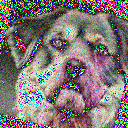

In [ ]:
sample_image = dataset[0]['image'].unsqueeze(0)
import torch
from PIL import Image

noise_tensor = torch.randn(sample_image.shape)
num_timesteps = torch.LongTensor([50])
perturbed_image = noise_scheduler.add_noise(sample_image, noise_tensor, num_timesteps)

restored_image = ((perturbed_image.permute(0, 2, 3, 1) + 1.0) * 140).type(torch.uint8).numpy()[0]
output_image = Image.fromarray(restored_image)
output_image

In [ ]:
import torch.nn.functional as F
optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate)

In [ ]:
from diffusers.optimization import get_cosine_schedule_with_warmup

lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=config.lr_warmup_steps,
    num_training_steps=(len(train_dataloader) * config.num_epochs),
)

In [ ]:
from diffusers import DDPMPipeline
import math

def create_image_grid(images, num_rows, num_cols):
    width, height = images[0].size
    grid = Image.new('RGB', size=(num_cols * width, num_rows * height))
    for idx, img in enumerate(images):
        grid.paste(img, box=(idx % num_cols * width, idx // num_cols * height))
    return grid

def perform_evaluation(updated_config, current_epoch, diffusion_pipeline):
    # Generate images from random noise (backward diffusion process).
    # The default pipeline output type is `List[PIL.Image]`
    generated_images = diffusion_pipeline(
        batch_size=updated_config.eval_batch_size,
        generator=torch.manual_seed(updated_config.seed),
    ).images

    # Create a grid from the generated images
    img_grid = create_image_grid(generated_images, num_rows=4, num_cols=4)

    # Save the images
    test_output_dir = os.path.join(updated_config.output_dir, "samples")
    os.makedirs(test_output_dir, exist_ok=True)
    img_grid.save(f"{test_output_dir}/{current_epoch:04d}.png")


In [ ]:
import torch
import torch.nn.functional as F
from accelerate import Accelerator
from tqdm.auto import tqdm
import os

def train(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler):
    # Initialize accelerator and tensorboard logging
    accelerator = Accelerator(
        mixed_precision='no',
        gradient_accumulation_steps=config.gradient_accumulation_steps,
        log_with="tensorboard",
        logging_dir=os.path.join(config.output_dir, "logs")
    )

    if config.output_dir is not None:
        os.makedirs(config.output_dir, exist_ok=True)
        accelerator.init_trackers("train_example")

    # Prepare everything
    model, optimizer, train_dataloader, lr_scheduler = accelerator.prepare(
        model, optimizer, train_dataloader, lr_scheduler
    )

    overall_step = 0

    # Train the model
    for epoch in range(config.num_epochs):
        progress_bar = tqdm(total=len(train_dataloader), disable=not accelerator.is_local_main_process)
        progress_bar.set_description(f"Epoch {epoch}")

        for step, batch in enumerate(train_dataloader):
            # retrive the clean image
            clean_images = batch['image']
            # generate random noise with the same shape as the clean_image
            noise = torch.randn(clean_images.shape).to(clean_images.device)
            #this is just batch size
            bs = clean_images.shape[0]

            '''This generates a tensor of random integers. The integers are drawn from a discrete 
           uniform distribution in the range [0, noise_scheduler.num_train_timesteps).
            The shape of the tensor is (bs,), where bs is the batch size, meaning one timestep is generated for each image in the batch.
            These timesteps represent the stages at which noise is added during the forward diffusion process.
             For each image in the batch, a different timestep is randomly chosen,
              which means different amounts of noise will be added to each image.
            '''
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=clean_images.device).long()
            '''
            clean_images: These are the original, noise-free images that you want to corrupt with noise.
            noise:  This is a tensor of noise that you want to add to the clean images. It's typically randomly generated and has the same shape as clean_images.
            timesteps: These are the stages at which you want to add the noise.
             Each timestep corresponds to a different amount of noise according to the noise schedule. We have generated the timestamp of shape (bs,) in above line
            '''
            noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)
            '''
            config.gradient_accumulation_steps = 2
            `accelerator.accumulate(model)`  is designed to handle gradient accumulation during model training.
            The gradient are computed for each forward and backward pass but the model weight are updated based on the gradient_accumulation_steps
            This technique enable to have effective batch size larger then the batch_size chosed in trainloader
            '''
            with accelerator.accumulate(model):
                noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
                loss = F.mse_loss(noise_pred, noise)
                accelerator.backward(loss)

                accelerator.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()

            progress_bar.update(1)
            logs = {"loss": loss.detach().item(), "lr": lr_scheduler.get_last_lr()[0], "step": overall_step}
            progress_bar.set_postfix(**logs)
            accelerator.log(logs, step=overall_step)
            overall_step += 1

        '''
        `if accelerator.is_main_process:` on the distributed training only the main process execute the following code. 
        This avoid redunant computation and conflict
        '''
        if accelerator.is_main_process:
          # This line initializes a DDPMPipeline object. We will use the pipeline to perform evaluation, save the generated image in that step
          #  and also we will save that pipeline
          pipeline = DDPMPipeline(unet=accelerator.unwrap_model(model), scheduler=noise_scheduler)

          if (epoch + 1) % config.save_image_epochs == 0 or (epoch + 1) % config.save_model_epochs == 0 or epoch == config.num_epochs - 1:
              perform_evaluation(config, epoch, pipeline)
              pipeline.save_pretrained(config.output_dir)


In [ ]:
train(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:258: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(


  0%|          | 0/276 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:135: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Further Training

In [ ]:
model_path = "/content/drive/MyDrive/Colab Notebooks/transformer_learn/chapter8/image_gen/unet/diffusion_pytorch_model.bin"
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:
train(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:258: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(


  0%|          | 0/276 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:135: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

# Let's Use the model for Inference
1. Our Model is Diffusion pipeline. Thus, you need to point to the location in  your drive where you have the pipeline shaped. The directory show have
  * model_index.json
  * unet 
  * scheduler

2. The following code shows how to create one image or multiple images.
3. DDPMP pipeline is slow but produce high quality images. Here, we are using DDIMPipeline which is faster

In [ ]:
from diffusers import DDPMPipeline, DDIMPipeline, PNDMPipeline

model_id = "/content/drive/MyDrive/Colab Notebooks/transformer_learn/chapter8/image_gen1/"

# load model and scheduler
ddim = DDIMPipeline.from_pretrained(model_id).to('cuda')  # you can replace DDPMPipeline with DDIMPipeline or PNDMPipeline for faster inference


  0%|          | 0/50 [00:00<?, ?it/s]

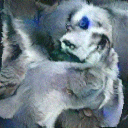

In [ ]:
from PIL import Image

# run pipeline in inference (sample random noise and denoise)
image = ddim().images[0]
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

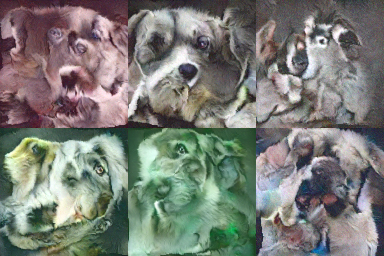

In [ ]:
from PIL import Image

# Generate 6 images
generated_images = ddim(batch_size=6).images

# Create a grid
num_rows = 2
num_cols = 3
width, height = generated_images[0].size
grid = Image.new('RGB', size=(num_cols * width, num_rows * height))

for idx, img in enumerate(generated_images):
    grid.paste(img, box=(idx % num_cols * width, idx // num_cols * height))

# Display the grid
grid.show()

# Analysis:
The model is not fully trained. To create high quality images we still need to go through multiple epochs of trainings